**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: \\
Member Names: Natasha Hussain | Daanish Khan
Member Student Numbers: 300122562 | 300126840

**2. Knapsack Problem**

In the knapsack problem, we are given a set of items with respective weights and prices. We are also given a container with a maximum capacity. To solve this problem, we must find the items to put in the container that gives us the most value, while also not going over the maximum capacity of the bag.

**3. Dataset**

The dataset provided gives us 10,000 different knapsack problems to solve, each including 5 items with its respective weight and values, as well as 1 container with max weight.

We used `knapsack_5_items.csv` from https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download

**Import important libraries**

In [24]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.

The link to the raw version is as follows:
*https://raw.githubusercontent.com/NatashaNaima/AI-KnapsackProblem/main/knapsack_5_items.csv*

For example:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Now provide the link to YOUR dataset and read the dataset using pandas:

In [25]:
url = 'https://raw.githubusercontent.com/NatashaNaima/AI-KnapsackProblem/main/knapsack_5_items.csv'
dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [26]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [27]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [28]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [29]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test**

In our generate and test program, we run a recursive method to compare the bag value with inclusion and exclusion of every item against every other item. This effectively creates every possible knapsack and guarantees a valid highest value solution will be found and will match our solution set for our problem set.

In [30]:
'''
In gen and test, we use recursion to compare every sub-bag 
to each other and get the best bag.out of all bags
'''
def gen_and_test(data):
    weights = data['Weights']
    prices = data['Prices']
    capacity = data['Capacity']
    best_solution = [0]*len(prices)
    best_solution_price = 0
    
    def recurse(cap, item_weight, item_val, item_number):
         # base case
        if item_number == -1 or cap == 0:
            return 0
        n = item_number - 1
        # item won't fit in current state of bag
        if item_weight > cap:
            return recurse(cap, weights[n], prices[n], n)
        else:
            # pick the bag that will return higher value
            include = item_val + recurse(cap - item_weight, weights[n], prices[n], n)
            exclude = recurse(cap, weights[n], prices[n], n)
            # if we include this item, set its value in the solution array to 1.
            if include > exclude:
                best_solution[item_number] = 1
            return max(include, exclude)
    
    last_item = len(prices) - 1
    best_solution_price = recurse(capacity, weights[last_item], prices[last_item], last_item)
    return best_solution_price, best_solution



In [31]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [32]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**

our gen and test has an accuracy of 1.0. Since we compare every possible instance of knapsacks and our algorithm always finds the best solution, we trust our dataset to be accurate. 

------------------------------------------------------------------------------------------------

**5. Greedy Search**

When performing a greedy search, we fill the bag one item at a time. If the bag is more valuable with the item in it than without it (and the next item instead), we keep it. We stop filling the bag when there are no more items or there is no more space in the bag.

In [33]:
def greedy(data):
	weights = data['Weights']
	prices = data['Prices']
	capacity = data['Capacity']
	best_solution = np.zeros(len(prices))

	# Get ratio of prices to weights and sorts them in descending order
	ratiosort = np.argsort(np.divide(prices, weights))[::-1]
	
	for index in ratiosort:

		# Adds item to solution if item does not exceed cap
		if capacity - weights[index] >= 0:
			capacity -= weights[index]
			best_solution[index] = 1

	return sum(np.where(best_solution == 1, prices, 0)), best_solution


In [34]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)

In [35]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8342949691264298


**Your Analysis:**

Running the Greedy Algorithm gives us an overall accuracy of 83.4%. The accuracy is quite high, but there are some cases that greedy will fail to obtain the optimal result. An example is shown below:

Capactiy = 50

|Objects|1|2|3|
|---|---|---|---|
|Profits|60|100|120|
|Weights|10|20|30|
|Ratios|6|5|4|

The greedy algorithm will choose objects 1 and 2 for its "optimal" solution, with the final price being 160. However, choosing objects 5 and 4 is the best solution, as it has a better price (220).

Since the algorithm is deterministic, it will also always have the same accuracy every time the algorithm is run, as it is producing the same results each time, due to there being no randomness attributed to this approach.

------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

Simulated Annealing aims to introduce randomness into our solution. Due to there potentially being local maxima, by introducing randomness we can explore other areas by accepting "bad" solutions at the beginning, and reject bad solutions as the "temperature" cools. This allows us to break out of local maximas and move towards an optimal solution.

In [36]:
import random as rand
import math

def accept(delta_energy, temperature):
	
	# Switching comparator since we are looking for increase in energy due to
	# us wanting to maximize price e.g. $15 is better than $12 therefore energy of 3
	if (delta_energy > 0):
		return True
	else:
		# Again, we are removing the negative on delta energy due to us wanting 
		# a positive energy change.
		return rand.random() < math.exp(delta_energy/temperature)
			

In [37]:
from numpy import random

def simulated_annealing(data, N, initial_temperature, cooling_rate):
	weights = data['Weights']
	prices = data['Prices']
	capacity = data['Capacity']
	
	temperature = initial_temperature

	# Initialize initial solution
	initial_picks = np.zeros(len(prices))

	# Randomly pick index to reduce bias, as iterating normally
	# there is a high chance of the first elements being picked due to cap being max
	shuffled_indexes = random.default_rng().choice(len(prices), size=len(prices), replace=False)
	cap = capacity

	for index in shuffled_indexes:
		# 50% chance to add to solution
		if random.randint(2) == 0 and cap - weights[index] >= 0:
			cap -= weights[index]
			initial_picks[index] = 1

	# Calculate initial energy
	energy = sum(np.where(initial_picks == 1, prices, 0))

	iterations = 0
	while temperature > 0.1 and iterations < N:
		iterations += 1

		# Get neighboring potential solution
		new_picks = np.copy(initial_picks)
		
		# Switches 0 to 1 and 1 to 0
		index = random.randint(len(prices))
		new_picks[index] = abs(new_picks[index] - 1)

		# Check if new picks does not overfill bag
		if sum(np.where(new_picks == 1, weights, 0)) > capacity:

			# Setting the fitness to an arbitrarily large negative number is better
			# than setting it to 0, as the accept function still could accept the invalid
			# solution out of pure randomness. This ensures that an invalid solution *never*
			# is able to be picked, as it lands outside the constraints of the problem and 
			# should not be considered.
			new_energy = -1000 * initial_temperature
		else:
			new_energy = sum(np.where(new_picks == 1, prices, 0))
		
		delta_energy = new_energy - energy

		if accept(delta_energy, temperature):
			initial_picks = np.copy(new_picks)
			energy = new_energy
		
		temperature *= cooling_rate

	return sum(np.where(initial_picks == 1, prices, 0)), initial_picks

Note: Since we are testing multiple different params, this algo takes a bit of time to run (~2m). It is not hung.

In [38]:
solutions_sa = []

solutions_cooling_1 = []
solutions_cooling_2 = []

solutions_n_1 = []
solutions_n_2 = []

solutions_temp_1 = []
solutions_temp_2 = []

solutions_combined = []

for _, row in dataset.iterrows():
	target = row['Best price']
    
	solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)
	solutions_sa.append(1 if target == solution else 0)
    
	solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.99)
	solutions_cooling_1.append(1 if target == solution else 0)

	solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.50)
	solutions_cooling_2.append(1 if target == solution else 0)

	solution, indexes = simulated_annealing(row, N = 100, initial_temperature=1, cooling_rate=0.95)
	solutions_n_1.append(1 if target == solution else 0)

	solution, indexes = simulated_annealing(row, N = 1000, initial_temperature=1, cooling_rate=0.95)
	solutions_n_2.append(1 if target == solution else 0)

	solution, indexes = simulated_annealing(row, N = 10, initial_temperature=100, cooling_rate=0.95)
	solutions_temp_1.append(1 if target == solution else 0)

	solution, indexes = simulated_annealing(row, N = 10, initial_temperature=500, cooling_rate=0.95)
	solutions_temp_2.append(1 if target == solution else 0)

	solution,indexes = simulated_annealing(row, N = 1000, initial_temperature=100, cooling_rate=0.99)
	solutions_combined.append(1 if target == solution else 0)
    


In [39]:
print("Simulated Annealing Accuracy (Given Params) is", np.mean(solutions_sa))
print("")
print("Simulated Annealing Accuracy (Cooling = 0.99) is", np.mean(solutions_cooling_1))
print("Simulated Annealing Accuracy (Cooling = 0.50) is", np.mean(solutions_cooling_2))
print("")
print("Simulated Annealing Accuracy (N = 100) is", np.mean(solutions_n_1))
print("Simulated Annealing Accuracy (N = 1000) is", np.mean(solutions_n_2))
print("")
print("Simulated Annealing Accuracy (Temp = 100) is", np.mean(solutions_temp_1))
print("Simulated Annealing Accuracy (Temp = 1000) is", np.mean(solutions_temp_2))
print("")
print("Simulated Annealing Accuracy (N = 1000, Temp = 100, Cooling = 0.99) is", np.mean(solutions_combined))

Simulated Annealing Accuracy (Given Params) is 0.3911327057394473

Simulated Annealing Accuracy (Cooling = 0.99) is 0.3869824881060836
Simulated Annealing Accuracy (Cooling = 0.50) is 0.28798461382731044

Simulated Annealing Accuracy (N = 100) is 0.45227249721631746
Simulated Annealing Accuracy (N = 1000) is 0.4480210547626278

Simulated Annealing Accuracy (Temp = 100) is 0.1424233221986031
Simulated Annealing Accuracy (Temp = 1000) is 0.12157100921145865

Simulated Annealing Accuracy (N = 1000, Temp = 100, Cooling = 0.99) is 0.7532138880453487


**Your Analysis:**

With the provided parameters, we get an over all accuracy of 38.8%. We can see that by increasing the cooling rate, we get better results, while decreasing the rate gives us a lower accuracy. 

Changing the number of iterations has diminishing returns: 10 -> 100 gives a ~4% increase while 100 -> 1000 barely changes. This can be attributed to N no longer being the limiting factor in the algorithm and allowing the temp to cool completley. 

Increasing temp decreases the accuracy by a lot, but this is expected - as N is limiting the amount of iterations, the algorithm does not have enough time to cool down. 

Changing multiple parameters (N = 1000, Temp = 100, Cooling = 0.99) gives us the best accuracy at 75%. This is due to N no longer being the limiting factor, as well as the algorithm being allowed to explore multiple different solutions before cooling down.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

In our genetic algorithm, we start with a sample population of 50 possible knapsacks.  From this starting sample, we produce 50 generations of the same population size. These additional generations are created by running tournaments on the previous generation where the fittest members (having the highest value valid knapsack) go on to create children. Parents are paired up and create children that are either replicas of themselves or have crossed genes and/or random mutations based on mutation and crossover rate.

In [40]:
import random


def calculate_fitness(ind, prices, weights, capacity):
  # first we calculate the value and weight of possible solution
  total_value = 0
  total_weight = 0
  for i in range(len(ind)):
    total_value += prices[i] * int(ind[i])
    total_weight += weights[i] * int(ind[i])
  # if the possible solution is heavier than the capacity, it is not a valid solution
  if total_weight > capacity:
    return 0
  # the fitness of our bag is its value.
  return total_value


def crossover(parent1, parent2, cross_rate):
  # determine if we cross or not. If we don't, return parents unchanged.
  if random.random() >= cross_rate:
    return parent1, parent2
  # make children from half of one parent and half of the other
  # we use
  child1 = parent1[:len(parent1) // 2] + parent2[len(parent1) // 2:]
  child2 = parent2[:len(parent1) // 2] + parent1[len(parent1) // 2:]
  return child1, child2


def mutation(child, mut_rate):
  for i in range(len(child)):
    if random.random() < mut_rate:
      child[i] = (child[i] + 1) % 2
  return child


# helper function to run tournament
def tournament(population, tournament_size, prices, weights, capacity):
  parents = []
  # Select repeat tournaments until we have desired population
  for _ in range(len(population)):
    # randomize tournament selection
    random.shuffle(population)
    # pick winner in candidate population
    valuable = 0
    valuable_candidate = []
    for candidate in population[:tournament_size]:
      candidate_fitness = calculate_fitness(candidate, prices, weights,
                                            capacity)
      if candidate_fitness > valuable:
        valuable_candidate = candidate
      valuable = max(valuable, candidate_fitness)
    parents.append(valuable_candidate)

  return parents


# helper function to create next generation
def next_gen(population, tournament_size, cross_rate, mut_rate, prices,
             weights, capacity):
  next_gen = []

  while len(next_gen) < len(population):
    # pick best candidates to reproduce
    parents = tournament(population, tournament_size, prices, weights,
                         capacity)

    for parent1, parent2 in zip(parents[::2], parents[1::2]):
      child1, child2 = crossover(parent1, parent2, cross_rate)
      child1 = mutation(child1, mut_rate)
      child2 = mutation(child2, mut_rate)

      next_gen.append(child1)
      next_gen.append(child2)

  return next_gen


def genetic_algorithm(data, population_size, num_generations, mut_rate,
                      cross_rate, tournament_size):
  weights = data['Weights']
  prices = data['Prices']
  capacity = data['Capacity']
  best_solution = [random.choice([0, 1]) for _ in range(len(prices))]
  best_solution_price = calculate_fitness(best_solution, prices, weights,
                                          capacity)
  # generate members of the population randomly based on the population size we want.
  population = [(random.choices([0, 1], k=len(prices)))
                for _ in range(population_size)]

  # reproduce until maximum generations are created.
  for _ in range(num_generations):
    population = next_gen(population, tournament_size, cross_rate, mut_rate,
                          prices, weights, capacity)

    max_individual = max(
        population,
        key=lambda x: calculate_fitness(x, prices, weights, capacity))
    max_fitness = calculate_fitness(max_individual, prices, weights, capacity)
    # save the best of the generation as solution
    if max_fitness > best_solution_price:
      best_solution_price = max_fitness
      best_solution = max_individual
  return best_solution_price, best_solution

Note: This algorithm takes quite a bit of time to complete (~30 min). It is not hung.

In [41]:
solutions_ga = []
solutions_mut_higher = []
solutions_mut_lower = []
solutions_cross_higher = []
solutions_cross_lower = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.5, cross_rate = 0.7, tournament_size = 5)
    solutions_mut_higher.append(1 if target == solution else 0)
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.0, cross_rate = 0.7, tournament_size = 5)
    solutions_mut_lower.append(1 if target == solution else 0)
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.9, tournament_size = 5)
    solutions_cross_higher.append(1 if target == solution else 0)
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.5, tournament_size = 5)
    solutions_cross_lower.append(1 if target == solution else 0)
print("DONE :)")

DONE :)


In [42]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))
print("Genetic Algorithm with a higher mutation rate Accuracy is", np.mean(solutions_mut_higher))
print("Genetic Algorithm with lower mutation rate Accuracy is", np.mean(solutions_mut_lower))
print("Genetic Algorithm Accuracy with higher cross rate is", np.mean(solutions_cross_higher))
print("Genetic Algorithm Accuracy with lower cross rate is", np.mean(solutions_cross_lower))

Genetic Algorithm Accuracy is 0.9786415629112258
Genetic Algorithm with a higher mutation rate Accuracy is 0.8959408847049296
Genetic Algorithm with lower mutation rate Accuracy is 0.9102135843708877
Genetic Algorithm Accuracy with higher cross rate is 0.9812734082397003
Genetic Algorithm Accuracy with lower cross rate is 0.965786010729831


**Your Analysis:**
Our base genetic algorithm had a success rate of ~97% showing that it is incredibly accurate and certainly an improvement on each iteration of our greedy algorithm. We also decided to change around the mutation and crossover rates and found mixed results.

Increasing the mutation rate actually reduced the accuracy to ~89%. This makes sense, as we would be introducing more pure random changes to the next generation resulting in a higher likelihood of decreased fitness between generations.
Reducing the mutation rate to none also reduced accuracy. While it was marginally better (~91%) compared to increased mutation for the reasons described above, it also means that minimally new combinations are introduced each generation as more and more are direct descendants are of the same few parents.

Changing the cross over rate seemed to change accuracy minimally. Increasing the crossover rate marginally increased the accuracy (~98%) while lowering the crossover rate marginally decreased the crossover rate (~97%). This implies that as long as there are crossovers, accuracy remains high. This tracks the motivation of the algorithm in which we want to propogate successful parents and crossovers allow us to propogate multiple high fitness "genes" (our item choices).

------------------------------------------------------------------------------------------------

**8. Comparative Study**

### Accuracy Comparison

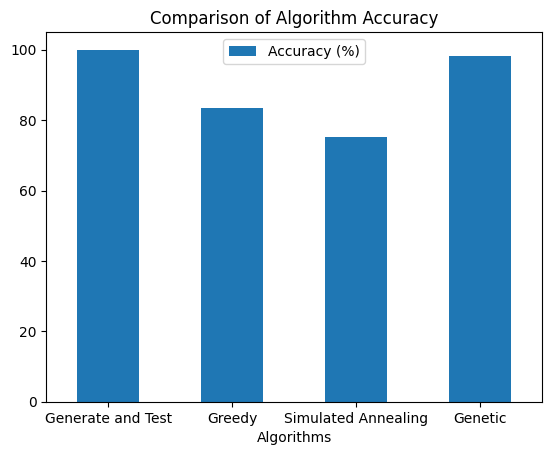

In [55]:
df = pd.DataFrame({
	'Algorithms': ['Generate and Test', 'Greedy', 'Simulated Annealing', 'Genetic'], 
	'Accuracy (%)': [np.mean(solutions) * 100, np.mean(solutions_greedy) * 100, np.mean(solutions_combined) * 100, np.mean(solutions_cross_higher) * 100]
})

ax = df.plot.bar(x='Algorithms', y='Accuracy (%)', title='Comparison of Algorithm Accuracy', rot=0)

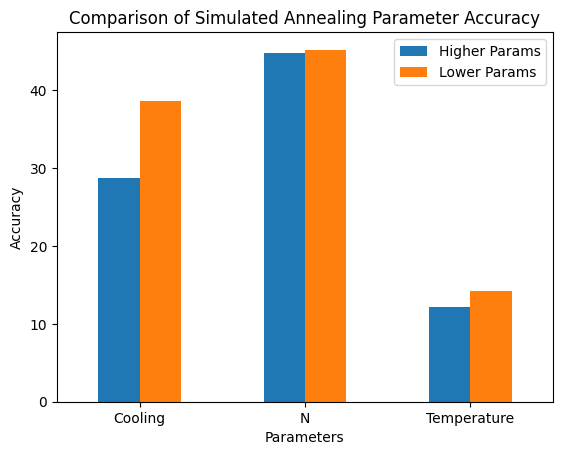

In [56]:
higher = [np.mean(solutions_cooling_2) * 100, np.mean(solutions_n_2) * 100, np.mean(solutions_temp_2) * 100]
lower = [np.mean(solutions_cooling_1) * 100, np.mean(solutions_n_1) * 100, np.mean(solutions_temp_1) * 100]

index = ['Cooling', 'N', 'Temperature']

df = pd.DataFrame(
	{
		'Higher Params': higher,
		'Lower Params': lower
	},
	index=index
)

ax = df.plot.bar(rot=0, xlabel='Parameters', ylabel='Accuracy', title='Comparison of Simulated Annealing Parameter Accuracy')

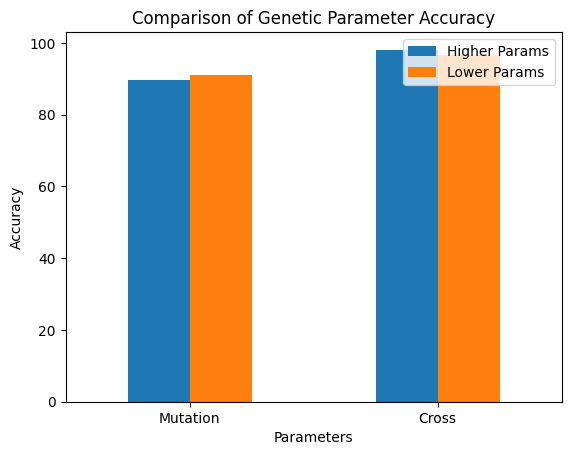

In [57]:
higher = [np.mean(solutions_mut_higher) * 100, np.mean(solutions_cross_higher) * 100]
lower = [np.mean(solutions_mut_lower) * 100, np.mean(solutions_cross_lower) * 100]

index = ['Mutation', 'Cross']

df = pd.DataFrame(
	{
		'Higher Params': higher,
		'Lower Params': lower
	},
	index=index
)

ax = df.plot.bar(rot=0, xlabel='Parameters', ylabel='Accuracy', title='Comparison of Genetic Parameter Accuracy')

--------------------------------------------------------------------------


**9. Conclusion**

Comment on the empirical study, its results, and give ideas for future work.

--------------------------------------------------------------------------


**10 References**

- https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/

- https://arpitbhayani.me/blogs/genetic-knapsack/

- https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download

Make sure you provide references to ALL sources used (articles, code, algorithms).

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".